In [1]:
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Flatten, Dense
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as K
import keras

import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os import system
import os
import random

import imageio

Using TensorFlow backend.


In [2]:
img_width, img_height = 16, 16

nb_epoch = 50
batch_size = 32

In [3]:
base_dir = '/home/niaki/Code/ImageNet/tiny-imagenet-200'

train_data_dir      = base_dir + '/tiny_train16'
validation_data_dir = base_dir + '/tiny_validation16'
test_data_dir       = base_dir + '/tiny_test16'

train_descrs_dir      = base_dir + '/tiny_sifts/tiny_train16'
validation_descrs_dir = base_dir + '/tiny_sifts/tiny_validation16'
test_descrs_dir       = base_dir + '/tiny_sifts/tiny_test16'


# nb_train_samples = 0
# train_folders = os.listdir(train_data_dir)
# train_folders.sort()
# for folder in train_folders:
#     nb_train_samples += len(os.listdir(train_data_dir + '/' + folder))
# print(nb_train_samples)

# nb_validation_samples = 0
# validation_folders = os.listdir(validation_data_dir)
# validation_folders.sort()
# for folder in validation_folders:
#     nb_validation_samples += len(os.listdir(validation_data_dir + '/' + folder))
# print(nb_validation_samples)

In [4]:
def loading_data(data_dir):
    files = listdir(data_dir + '/class0')
    files.sort()

    images = []

    for file in files:
        image = imageio.imread(data_dir + '/class0/' + file)
    #     image = np.expand_dims(image, axis=0)
        images.append(image)

    images = np.array(images)
    images = images.astype(np.float64) / 255
    print(images.shape)
    return images

In [5]:
x_train = loading_data(train_data_dir)
x_validation = loading_data(validation_data_dir)

(157086, 16, 16, 3)
(3932, 16, 16, 3)


In [6]:
def loading_descrs(descrs_dir):
    files = listdir(descrs_dir + '/class0')
    files.sort()

    descrs = []

    for file in files:
        descr = np.load(descrs_dir + '/class0/' + file)
        descrs.append(descr)

    descrs = np.array(descrs)
    print(descrs.shape)
    return descrs

In [7]:
y_train = loading_descrs(train_descrs_dir)
y_validation = loading_descrs(validation_descrs_dir)

(157086, 128)
(3932, 128)


In [65]:
input_shape = (img_width, img_height, 3)
input_img = Input(shape=input_shape)

x = Conv2D(32, (3, 3), activation="relu", padding="same")(input_img)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Flatten(data_format="channels_last")(x)
encoded = Dense(128, activation="relu")(x)

encoder = Model(input_img, encoded)

encoder.compile(optimizer='rmsprop', metrics=['accuracy'], loss='mean_squared_error')

encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 2, 2, 32)          0         
__________

In [66]:
model_version = '0.0.5_relu_rmsprop_mse'

os.system('mkdir ' + base_dir + '/weights' + model_version)
checkpointer = keras.callbacks.ModelCheckpoint(base_dir + '/weights' + model_version + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

encoder.fit(x_train, y_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_validation, y_validation),
                callbacks=[checkpointer])

encoder.save(base_dir + '/encoder' + model_version + '.h5')

Train on 157086 samples, validate on 3932 samples
Epoch 1/50
157086/157086 [==============================] - 3s 22us/step - loss: 878.5997 - acc: 0.0339 - val_loss: 724.1771 - val_acc: 0.0463
Epoch 2/50
157086/157086 [==============================] - 3s 19us/step - loss: 686.1925 - acc: 0.0443 - val_loss: 679.1227 - val_acc: 0.0521
Epoch 3/50
157086/157086 [==============================] - 3s 19us/step - loss: 596.6774 - acc: 0.0559 - val_loss: 543.2714 - val_acc: 0.0633
Epoch 4/50
157086/157086 [==============================] - 3s 20us/step - loss: 511.2684 - acc: 0.0666 - val_loss: 498.7569 - val_acc: 0.0949
Epoch 5/50
157086/157086 [==============================] - 3s 19us/step - loss: 471.8603 - acc: 0.0936 - val_loss: 416.7472 - val_acc: 0.1170
Epoch 6/50
157086/157086 [==============================] - 3s 18us/step - loss: 407.4200 - acc: 0.1093 - val_loss: 430.1978 - val_acc: 0.1277
Epoch 7/50
157086/157086 [==============================] - 3s 18us/step - loss: 377.1843 - 

In [14]:
encoder.predict(imageio.imread("/home/niaki/Code/ImageNet/tiny-imagenet-200/tiny_validation16/class0/patch000042.png").reshape(1,16,16,3))

array([[   0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    , 4868.5205, 4023.8813,
        4274.1313, 3769.6223, 3908.8608, 3976.735 , 5740.837 , 5447.644 ,
        4223.6377, 4570.0483, 3454.2148, 5305.5093, 4480.3125, 5471.8   ,
        5694.5645, 4671.992 ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
           0.    ,    0.    ,    0.    ,    0.    ,    0.    ,    0.    ,
        3938.6873, 4880.0425, 5760.641 ,    0.    ,    0.    , 5033.5723,
        5821.17  , 5374.6035, 4484.09 

In [67]:
encoder.predict(imageio.imread("/home/niaki/Code/ImageNet/tiny-imagenet-200/tiny_validation16/class0/patch000042.png").reshape(1,16,16,3))

array([[    0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,  4424.3037 ,  3236.1387 , 12960.133  ,
        12103.912  , 18365.799  ,   827.81384,     0.     ,     0.     ,
        10342.382  , 12538.56   , 17413.803  , 13473.148  , 16702.041  ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     0.     ,     0.     ,
            0.     ,     0.     ,     0.     ,     

In [24]:
def fixed_generator(x_train, y_train):
    for i, x in enumerate(x_train):
        yield x.reshape((1,16,16,3)), y_train[i].reshape((1,128))

In [72]:
def fixed_generator(x_train, y_train, batch_size):
    while True:
        batch_list_x = []
        batch_list_y = []
        
        for i in range(x_train.shape[0]):
            batch_list_x.append(x_train[i])
            batch_list_y.append(y_train[i])
            if len(batch_list_x) == batch_size:
                yield (np.array(batch_list_x),np.array(batch_list_y))
                batch_list_x = []
                batch_list_y = []


In [73]:
model_version = '0.0.5.1_relu_rmsprop_mse_generated'

os.system('mkdir ' + base_dir + '/weights' + model_version)
checkpointer = keras.callbacks.ModelCheckpoint(base_dir + '/weights' + model_version + '/weights.{epoch:02d}-{val_loss:.2f}.hdf5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)

encoder.fit_generator(fixed_generator(x_train, y_train, 32),
                steps_per_epoch=157086,
                epochs=50,
                validation_data=fixed_generator(x_validation, y_validation, 32),
                validation_steps=3932,
                callbacks=[checkpointer]
                )

encoder.save(base_dir + '/encoder' + model_version + '.h5')

Epoch 1/50
157086/157086 [==============================] - 635s 4ms/step - loss: 121.1201 - acc: 0.1237 - val_loss: 118.9131 - val_acc: 0.1239
Epoch 2/50
157086/157086 [==============================] - 633s 4ms/step - loss: 103.5015 - acc: 0.1250 - val_loss: 95.7820 - val_acc: 0.1338
Epoch 3/50
157086/157086 [==============================] - 636s 4ms/step - loss: 98.7486 - acc: 0.1275 - val_loss: 97.8074 - val_acc: 0.1413
Epoch 4/50
157086/157086 [==============================] - 636s 4ms/step - loss: 97.4838 - acc: 0.1287 - val_loss: 96.8871 - val_acc: 0.1273
Epoch 5/50
157086/157086 [==============================] - 627s 4ms/step - loss: 95.9125 - acc: 0.1309 - val_loss: 101.7384 - val_acc: 0.1229
Epoch 6/50
157086/157086 [==============================] - 658s 4ms/step - loss: 93.4261 - acc: 0.1320 - val_loss: 119.4924 - val_acc: 0.1032
Epoch 7/50
157086/157086 [==============================] - 752s 5ms/step - loss: 92.7465 - acc: 0.1319 - val_loss: 93.0222 - val_acc: 0.1380
E

In [75]:
encoder.predict(imageio.imread("/home/niaki/Code/ImageNet/tiny-imagenet-200/tiny_validation16/class0/patch000010.png").reshape(1,16,16,3))

array([[     0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
        311629.72 , 324981.62 , 587550.9  , 300621.44 , 277802.44 ,
        620930.5  , 369696.8  , 174378.53 , 356632.44 , 179965.12 ,
        311662.3  ,      0.   , 297744.97 , 465017.12 , 118608.24 ,
        175118.34 ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   , 203758.33 ,  467

In [82]:
import sys

In [106]:
image_path = '/home/niaki/Downloads/Lenna.png'

patch_size = 16
patch_width = patch_size
patch_height = patch_size

nearest_patches_nb = -1
query_stride = 100
compare_stride = 2
eps = 0.0001

In [107]:
image = imageio.imread(image_path)

# to be deleted
# image = image[:40, :40, :]

image_height = image.shape[0]
image_width = image.shape[1]

if nearest_patches_nb == -1:
    nearest_patches_nb = len(range(0, image_width - patch_size + 1, compare_stride)) * len(range(0, image_height - patch_size + 1, compare_stride))

In [108]:
def patch_diff(patch1, patch2):
    if patch1.shape != patch2.shape:
        print("Patches don't have the same shape.")
        return
    return np.sum((np.array(patch1, dtype=np.float32) - np.array(patch2, dtype=np.float32))**2)

In [109]:
results_noisy_descr_patches_diffs = {}
results_noisy_descr_patches_x_coords = {}
results_noisy_descr_patches_y_coords = {}
results_noisy_descr_patches_positions = {}

counter_query_patches = 0

12, 9
122, 168
101, 315
473, 26

compare_stride = 8

x_querys = [9, 58, 315, 26] #[9, 168, 315, 26] 
y_querys = [12, 233, 101, 473] #[12, 122, 101, 473]

total_nr_query_patches = len(x_querys)

for query_it in range(total_nr_query_patches):
    
    x_query = x_querys[query_it]
    y_query = y_querys[query_it]
    
    sys.stdout.write("\r" + str(counter_query_patches + 1) + "/" + str(total_nr_query_patches))

    query_patch = image[x_query : x_query + patch_size, y_query : y_query + patch_size, :]
    query_patch_descr = encoder.predict(np.expand_dims(query_patch, axis=0))[0]
#         query_patch_descr = np.mean(query_patch)

    counter_compare_patches = 0
    compare_patches_scores = {}

    patches_diffs = [100000000000]
    patches_x_coords = [-1]
    patches_y_coords = [-1]
    patches_positions = [-1]

    for y_compare in range(0, image_width - patch_size + 1, compare_stride):
        for x_compare in range(0, image_height - patch_size + 1, compare_stride):
                        
            compare_patch = image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :]
            compare_patch_descr = encoder.predict(np.expand_dims(compare_patch, axis=0))[0]
#                 compare_patch_descr = np.mean(compare_patch)

            diff = patch_diff(query_patch_descr, compare_patch_descr)
#                 diff = (query_patch_descr - compare_patch_descr)**2

            if diff < eps:
                counter_compare_patches += 1
                continue
            
#             print(diff)
            
            # sorting
            for i in range(len(patches_diffs)):
                if diff < patches_diffs[i]:
#                     print('ufewhu')
                    patches_diffs.insert(i, diff)
                    patches_x_coords.insert(i, x_compare)
                    patches_y_coords.insert(i, y_compare)
                    patches_positions.insert(i, counter_compare_patches)
                    break

            counter_compare_patches += 1

    results_noisy_descr_patches_diffs[counter_query_patches] = patches_diffs[:nearest_patches_nb]
    results_noisy_descr_patches_x_coords[counter_query_patches] = patches_x_coords[:nearest_patches_nb]
    results_noisy_descr_patches_y_coords[counter_query_patches] = patches_y_coords[:nearest_patches_nb]
    results_noisy_descr_patches_positions[counter_query_patches] = patches_positions[:nearest_patches_nb]

    counter_query_patches += 1

4/4

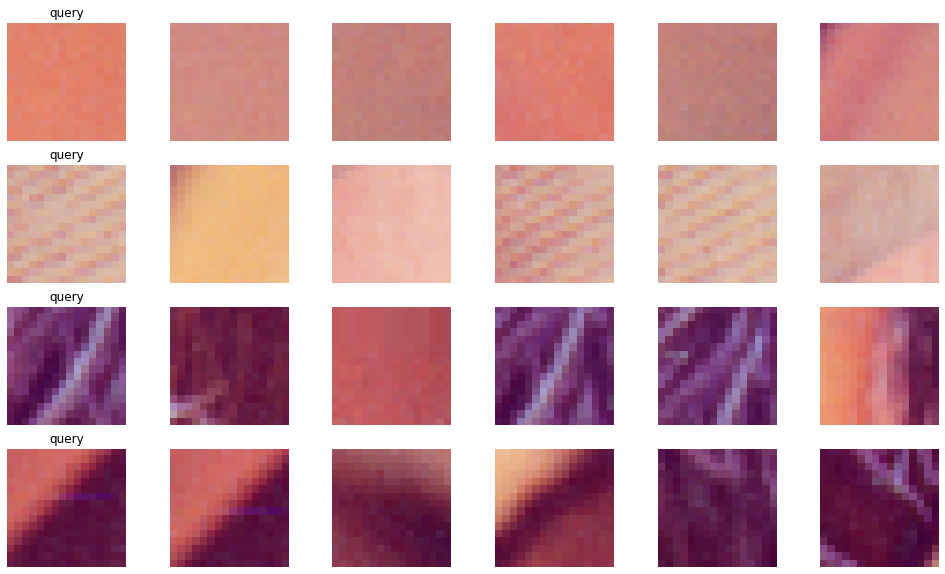

In [110]:
fig = plt.figure(figsize=(17, 10))

nr_similar_patches = 5

columns = nr_similar_patches + 1
rows = total_nr_query_patches

counter_query_patches = 0

x_querys = [9, 58, 315, 26] #[9, 168, 315, 26] 
y_querys = [12, 233, 101, 473] #[12, 122, 101, 473]

total_nr_query_patches = len(x_querys)

for query_it in range(total_nr_query_patches):
    
    x_query = x_querys[query_it]
    y_query = y_querys[query_it]

    ax = fig.add_subplot(rows, columns, counter_query_patches * (nr_similar_patches + 1) + 1)
    ax.axis('off')
    ax.set_title('query')
    ax.imshow(image[x_query : x_query + patch_size, y_query : y_query + patch_size, :])

    for i in range(nr_similar_patches):
        x_compare = results_noisy_descr_patches_x_coords[counter_query_patches][i]
        y_compare = results_noisy_descr_patches_y_coords[counter_query_patches][i]

#         psnr = calculate_psnr(image[x_query : x_query + patch_size, y_query : y_query + patch_size, :], 
#                              image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :])
        
        ax = fig.add_subplot(rows, columns, counter_query_patches * (nr_similar_patches + 1) + 2 + i)
        ax.axis('off')
#         ax.set_title('S' + str(i + 1))
#         ax.set_title("{:.2f} [dB]".format(psnr))
        ax.imshow(image[x_compare : x_compare + patch_size, y_compare : y_compare + patch_size, :])

    counter_query_patches += 1

In [113]:
print('jfdj')

jfdj
